# imports

In [42]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


 # read csv

In [43]:
df  = pd.read_csv('faults-faults.csv')

    viewing the dataset

In [44]:
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


# plotting the histogram for all the columns

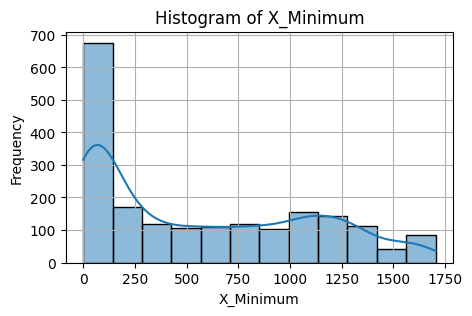

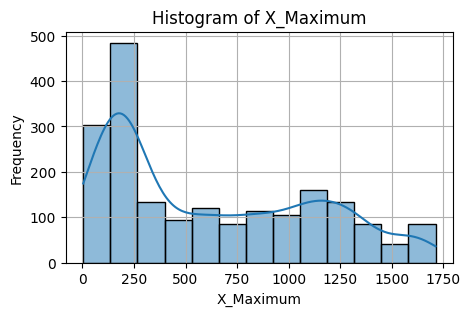

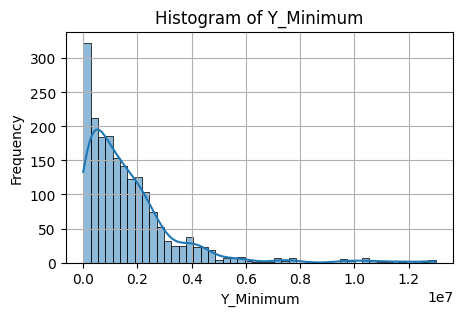

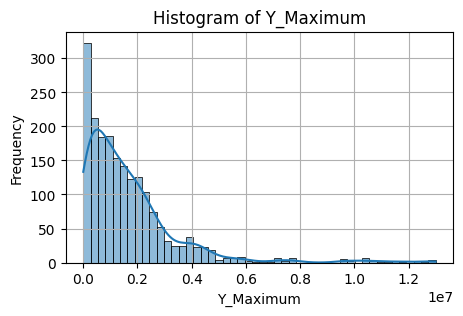

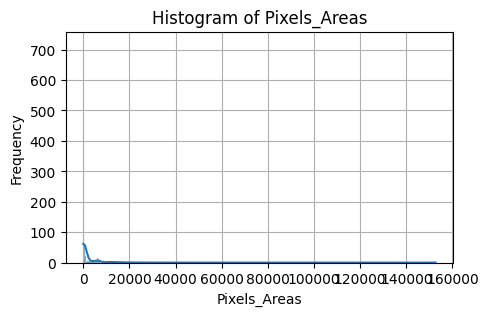

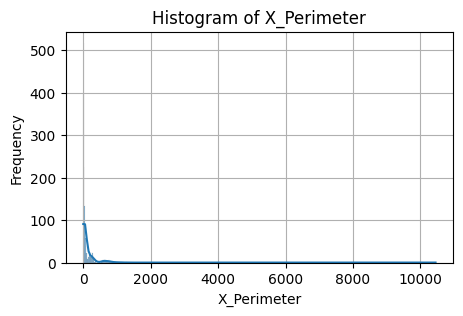

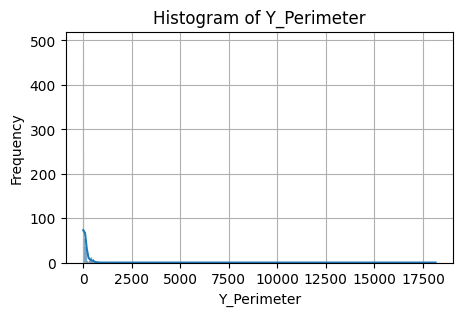

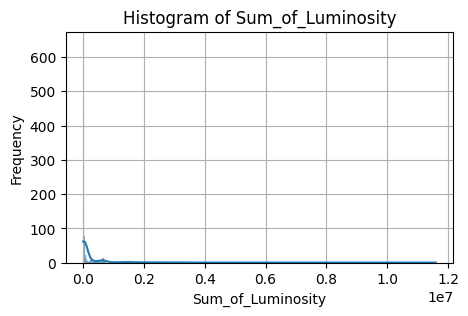

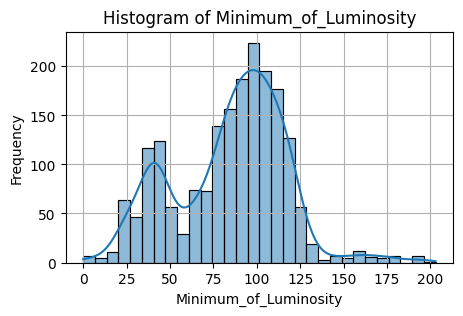

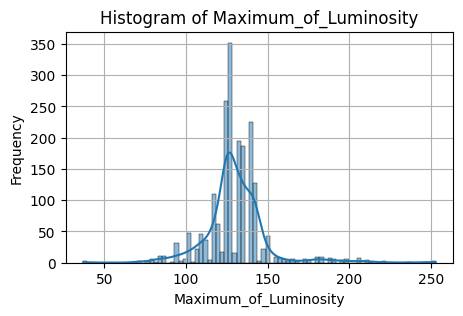

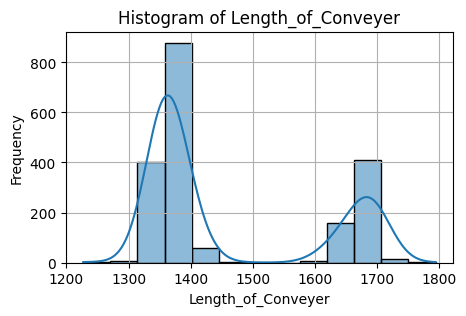

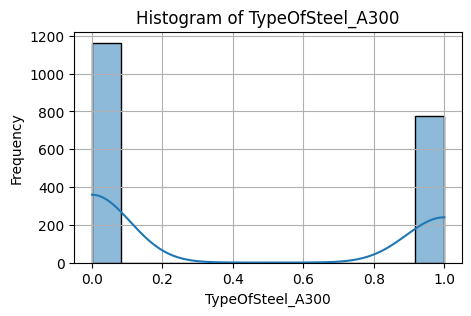

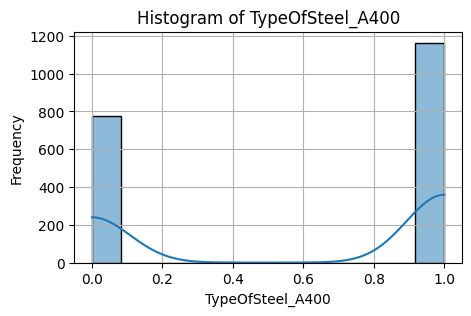

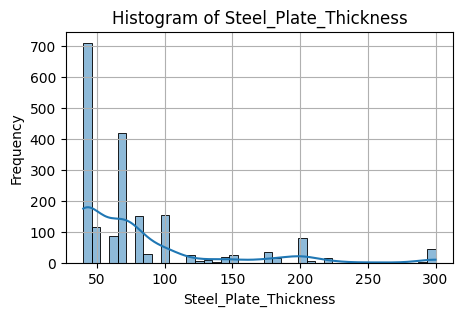

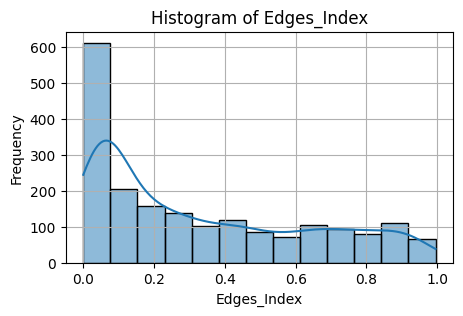

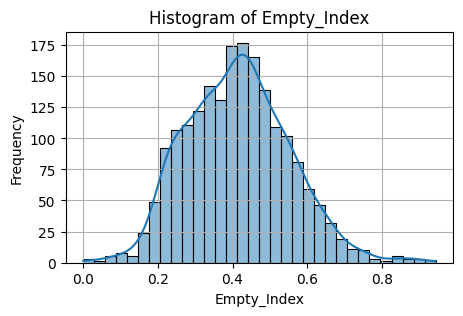

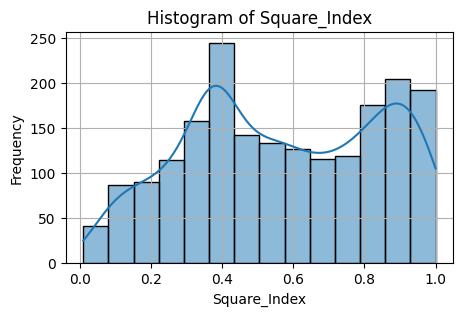

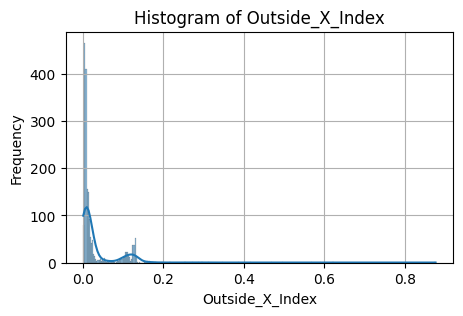

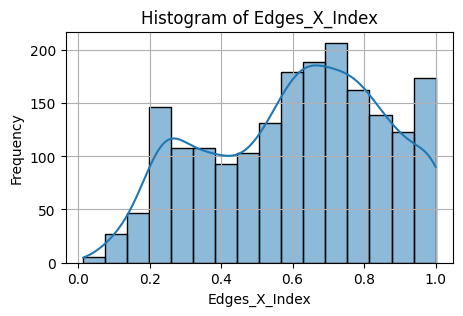

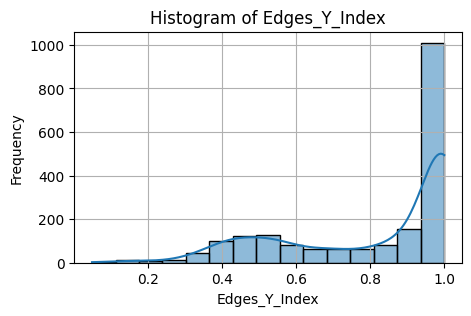

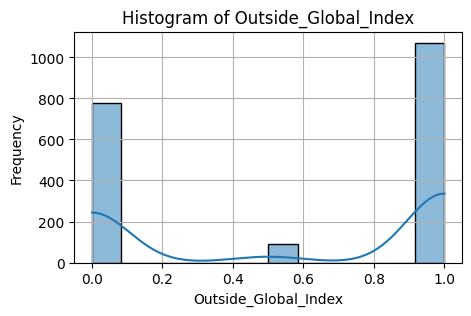

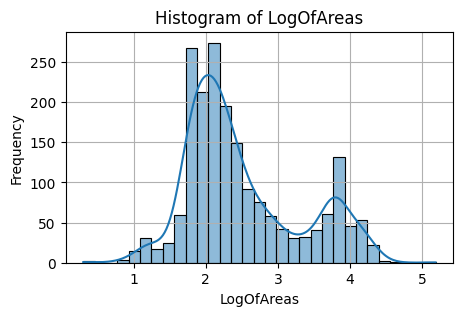

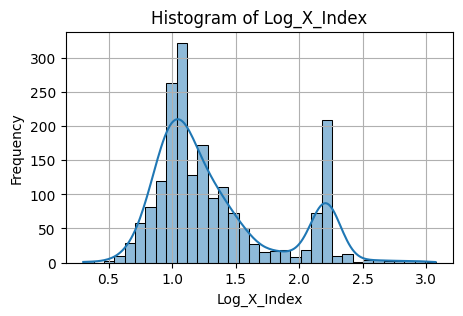

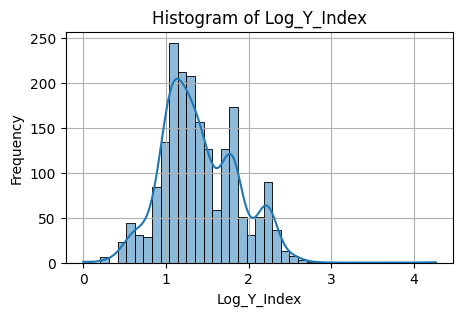

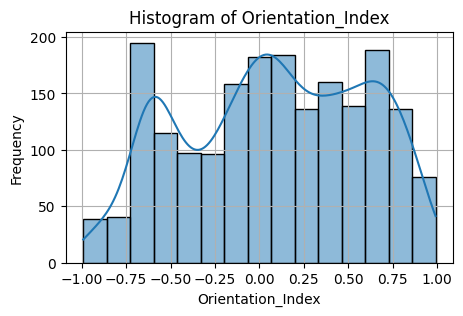

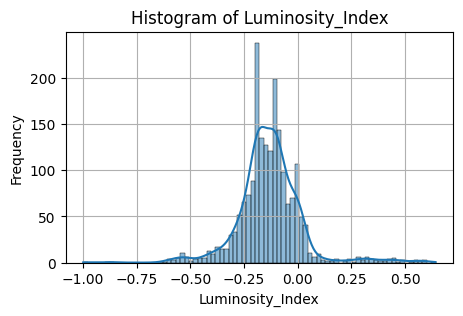

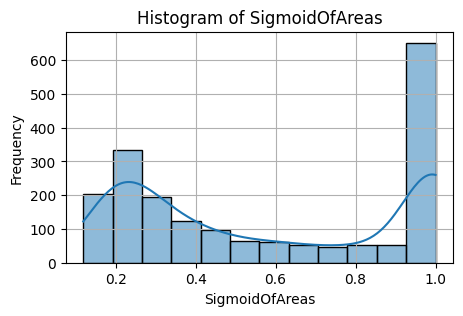

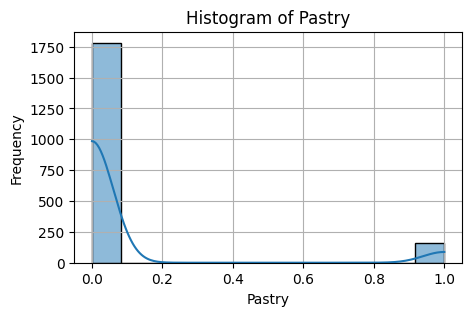

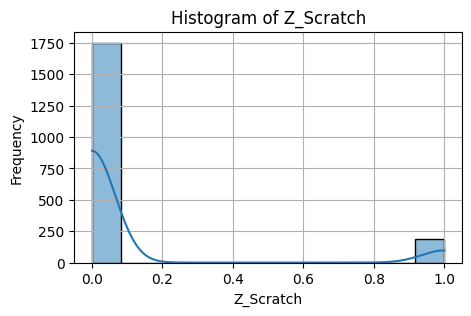

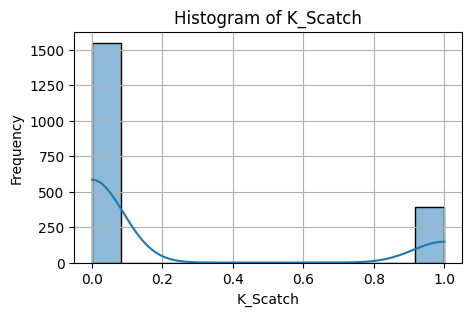

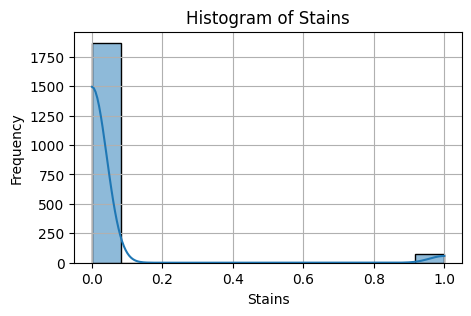

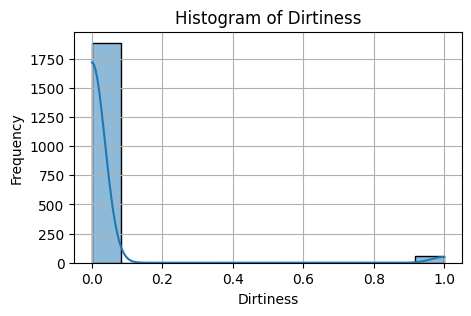

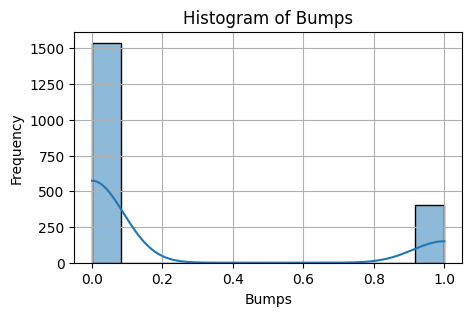

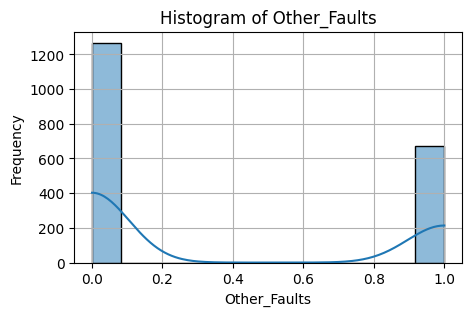

In [45]:
#plot histogram for all columns
for col in df.columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()


# plotting the coorelation heatmap of the dataset 

<Axes: >

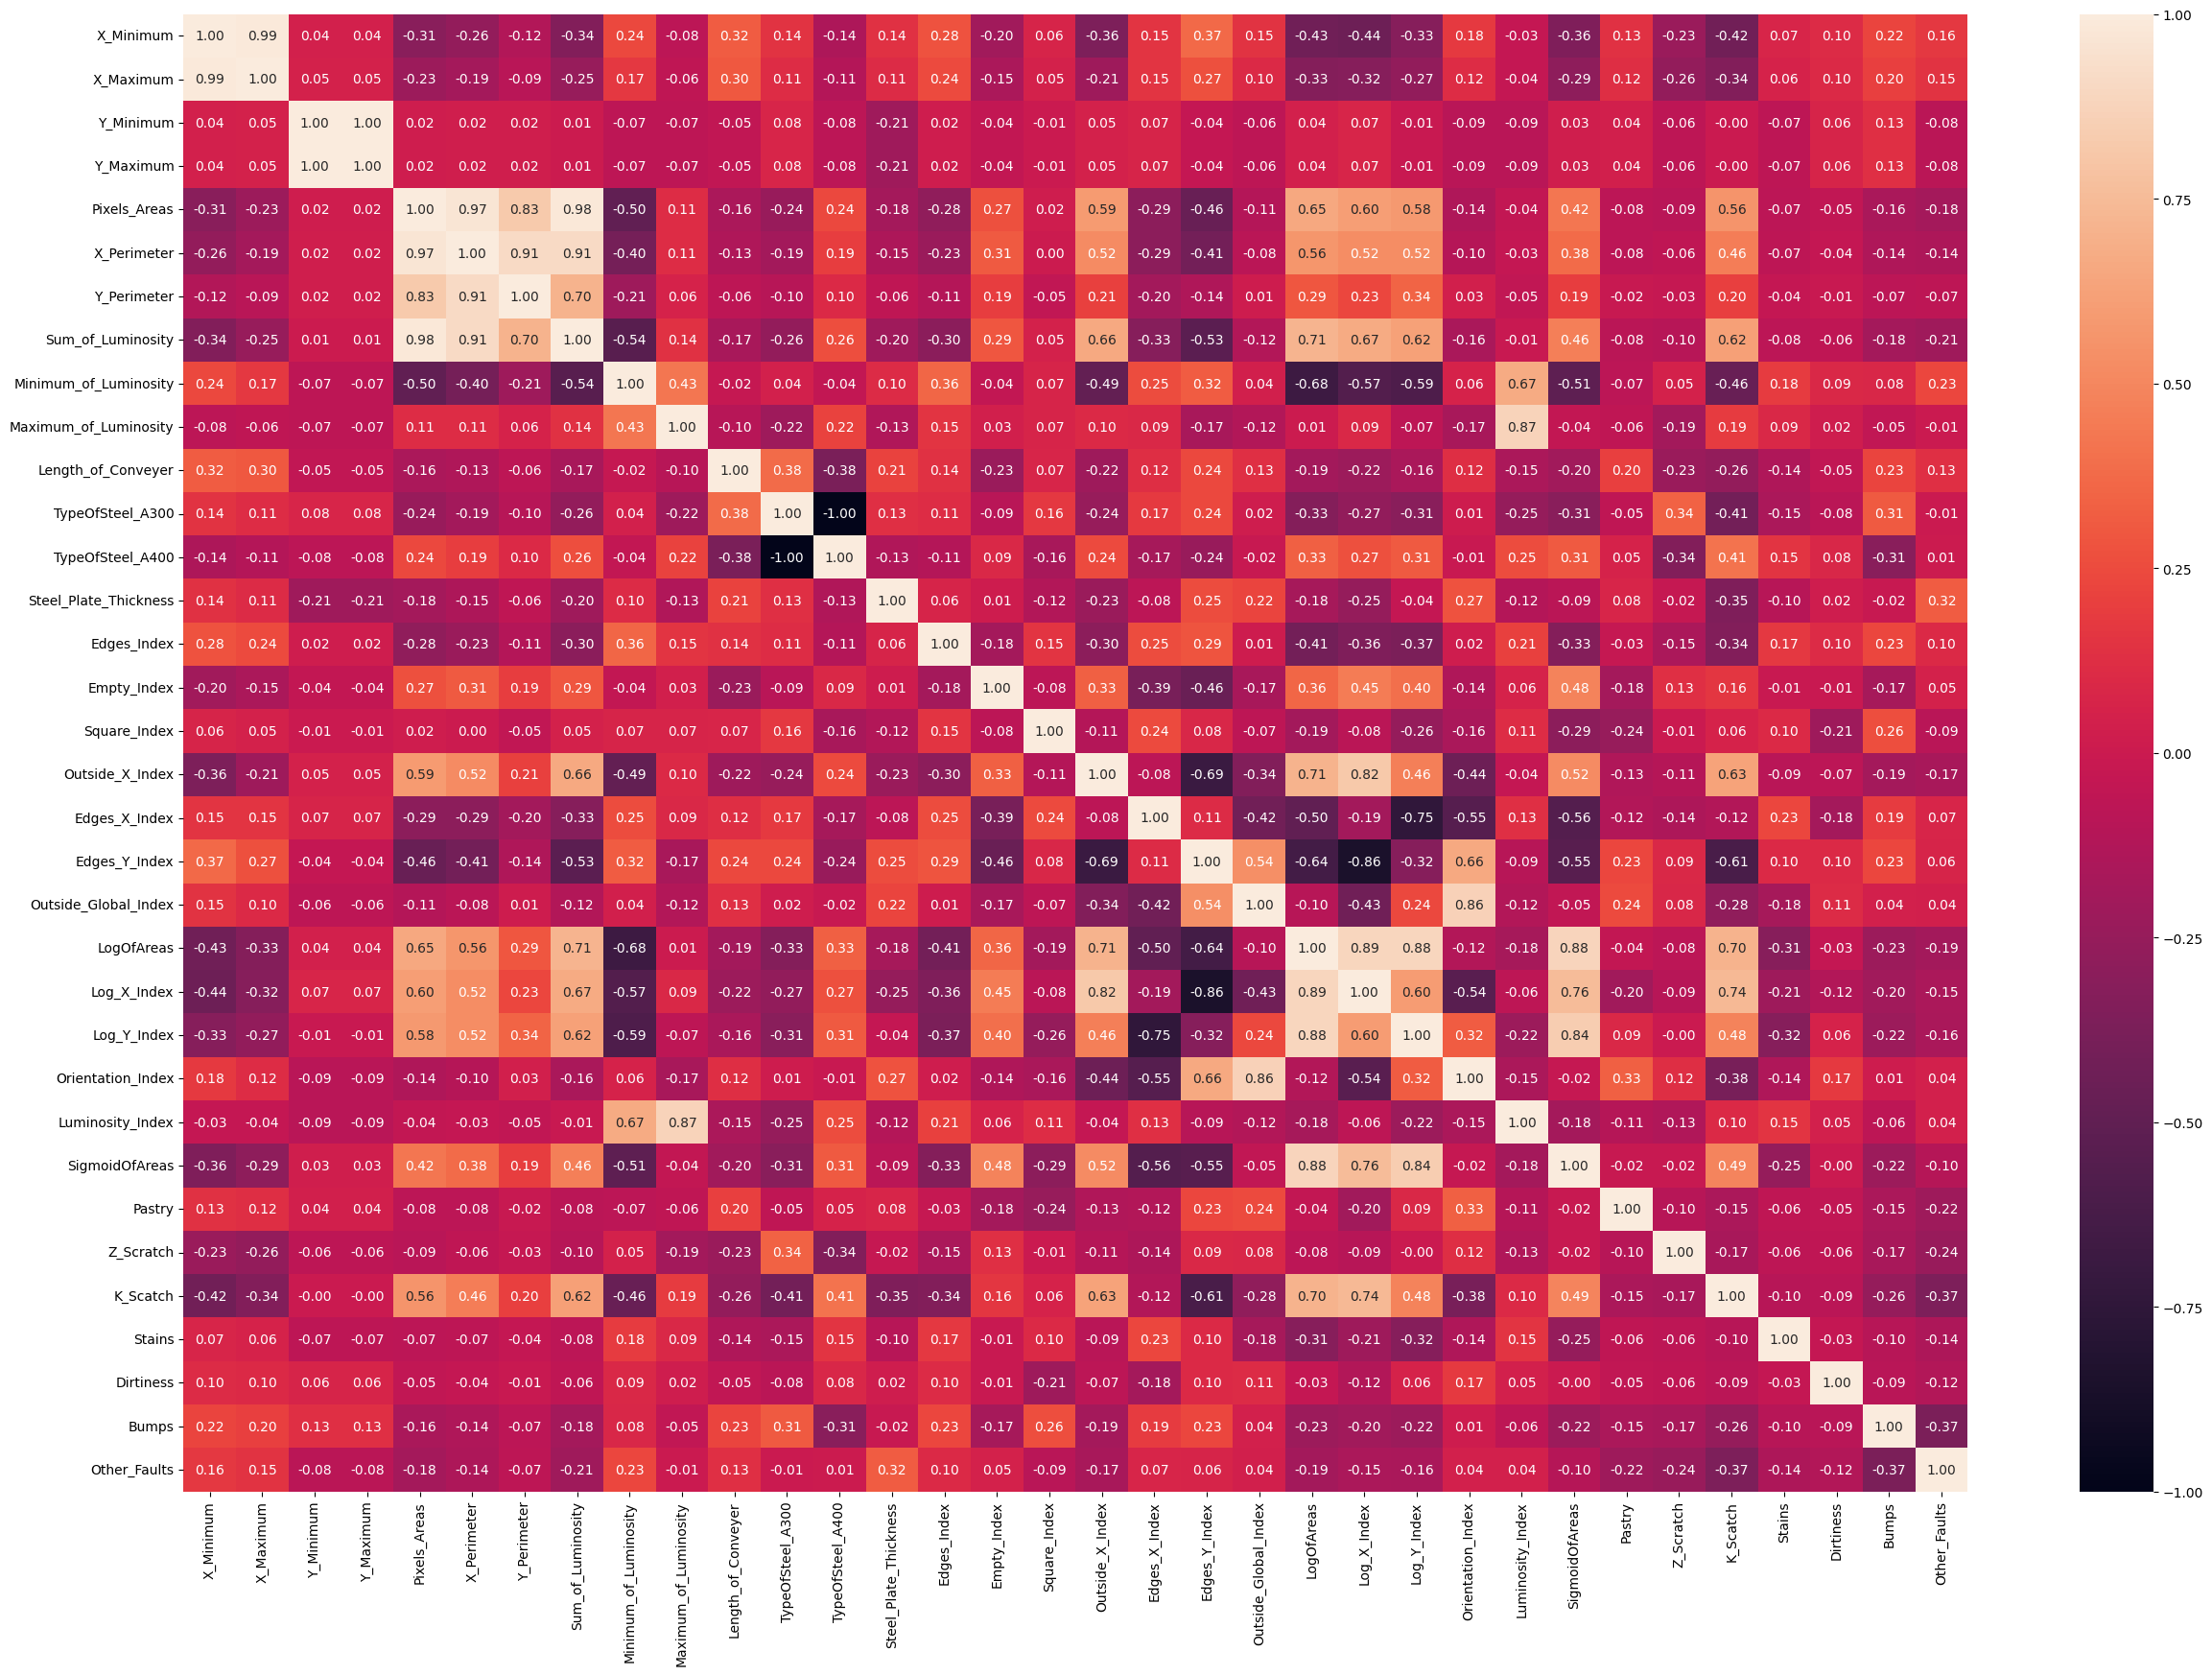

In [46]:
crorrelation_matrix = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(crorrelation_matrix, annot=True, fmt='.2f')

# seprating the columns for x and y set

In [47]:
X = df.drop(columns=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'])
y = df[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [48]:
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,1360,0,1,40,0.3662,0.3906,0.5714,0.0206,0.5185,0.7273,0.0,2.4362,1.4472,1.2041,-0.4286,0.0026,0.7254
1937,144,175,340581,340598,287,44,24,34599,112,133,1360,0,1,40,0.2118,0.4554,0.5484,0.0228,0.7046,0.7083,0.0,2.4579,1.4914,1.2305,-0.4516,-0.0582,0.8173
1938,145,174,386779,386794,292,40,22,37572,120,140,1360,0,1,40,0.2132,0.3287,0.5172,0.0213,0.7250,0.6818,0.0,2.4654,1.4624,1.1761,-0.4828,0.0052,0.7079
1939,137,170,422497,422528,419,97,47,52715,117,140,1360,0,1,40,0.2015,0.5904,0.9394,0.0243,0.3402,0.6596,0.0,2.6222,1.5185,1.4914,-0.0606,-0.0171,0.9919


In [49]:
faults = y

# merging the columns of y data frame to one classifying column

In [50]:
y =[]
for i in range(faults.shape[0]):
    if faults.iloc[i]['Pastry'] == 1:
        y.append('Pastry')
    elif faults.iloc[i]['Z_Scratch'] == 1:
        y.append('Z_Scratch')
    elif faults.iloc[i]['K_Scatch'] == 1:
        y.append('K_Scatch')
    elif faults.iloc[i]['Stains'] == 1:
        y.append('Stains')
    elif faults.iloc[i]['Dirtiness'] == 1:
        y.append('Dirtiness')
    elif faults.iloc[i]['Bumps'] == 1:
        y.append('Bumps')
    else:
        y.append('Other_Faults')
    
    




In [51]:
y= np.array(y)
y



array(['Pastry', 'Pastry', 'Pastry', ..., 'Other_Faults', 'Other_Faults',
       'Other_Faults'], shape=(1941,), dtype='<U12')

 # Splitting the data sets for training and test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# CREATING THE PIPELINE FOR THE VARIOUS MODELS TO TEST UPON

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#define classification models
models ={
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'svc': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    
}
#train and evaluate each model
for name,model in models.items():
    print(f'Training {name}...')
    model.fit(X_train,y_train)
    y_predict =model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print(f'Accuracy of {name}: { accuracy * 100:.2f}%')
    print(classification_report(y_test,y_predict))

    print('-' * 50)
    print('Confusion Matrix:')
    confusion = confusion_matrix(y_test,y_predict)
    print(confusion)
    
    print('-' * 50)
    print('-' * 50)
   
    










 # supreess warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)



Training LogisticRegression...
Accuracy of LogisticRegression: 52.44%
              precision    recall  f1-score   support

       Bumps       0.53      0.24      0.33        72
   Dirtiness       0.00      0.00      0.00         8
    K_Scatch       0.91      0.75      0.82        83
Other_Faults       0.44      0.87      0.58       143
      Pastry       0.00      0.00      0.00        29
      Stains       0.00      0.00      0.00        13
   Z_Scratch       0.00      0.00      0.00        41

    accuracy                           0.52       389
   macro avg       0.27      0.27      0.25       389
weighted avg       0.45      0.52      0.45       389

--------------------------------------------------
Confusion Matrix:
[[ 17   0   0  55   0   0   0]
 [  1   0   0   7   0   0   0]
 [  0   0  62  19   0   2   0]
 [ 12   0   5 125   0   1   0]
 [  2   0   1  26   0   0   0]
 [  0   0   0  13   0   0   0]
 [  0   0   0  41   0   0   0]]
----------------------------------------------

# comparision of the various outcomes 

Text(0.5, 0, 'Model')

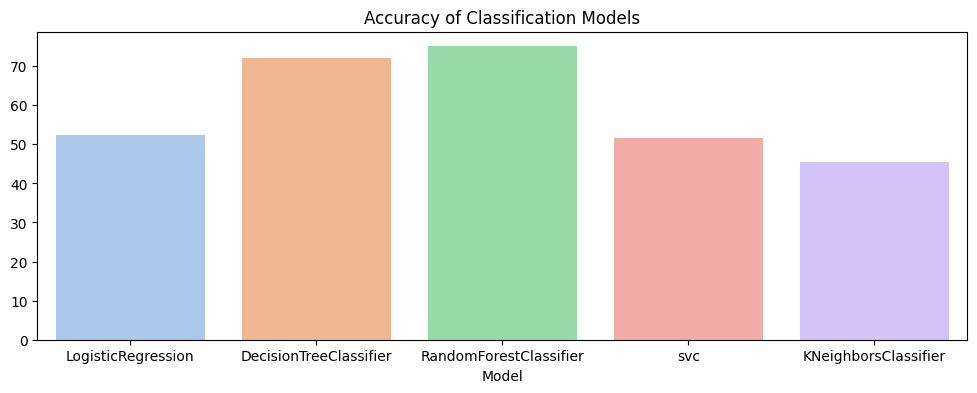

In [70]:
#plot the bar graph figure for the accuracy of each model
accuracy_list = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    accuracy_list.append(accuracy * 100)
plt.figure(figsize=(12, 4))
sns.barplot(x=list(models.keys()), y=accuracy_list, palette='pastel')
plt.title('Accuracy of Classification Models')
plt.xlabel('Model')
